In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from fastai.tabular.all import *

In [2]:
# Import the CSV and show it
# Load the data
df = pd.read_csv('./titanic.csv');

# Print the column types
print(df.dtypes)

# Show the data
df

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
2urvived         int64
dtype: object


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


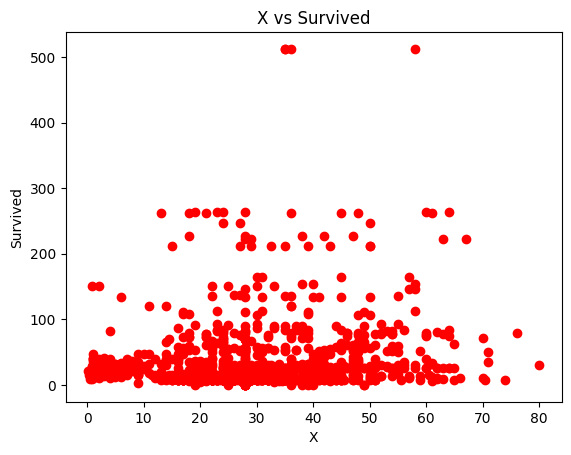

In [3]:
# Do a graph
# Get the variables used
x_plt = df['Age'].to_numpy()
y_plt = df['Fare'].to_numpy()

# Set the data and define the line properties
plt.plot(x_plt, y_plt, 'ro')

# Set some labels
plt.title('X vs Survived')
plt.xlabel('X')
plt.ylabel('Survived')

# Show it
plt.show()

In [4]:
# To scale between 0 and 1
scaler = MinMaxScaler()

# Transformations
# 0 to 1
fare = scaler.fit_transform(df[['Fare']])
age = scaler.fit_transform(df[['Age']])
sibsp = scaler.fit_transform(df[['sibsp']])
parch = scaler.fit_transform(df[['Parch']])

# Dummy variables
# ['pclass_1', 'pclass_2']
pclass = pd.get_dummies(df['Pclass'], prefix='pclass')

In [5]:
# New variable definitions
x = ['pclass_1', 'pclass_2', 'fare', 'sex', 'age', 'sibsp', 'parch']
y = ['survived']

# Replace the old columns
df['fare'] = fare
df['age'] = age
df['sibsp'] = sibsp
df['parch'] = parch
df['sex'] = df['Sex']
df['survived'] = df['2urvived']

# Add new columns
df['pclass_1'] =  pclass[['pclass_1']]
df['pclass_2'] =  pclass[['pclass_2']]

# Define the new data frame and show it
df_new = df[x + y]
df_new

,pclass_1,pclass_2,fare,sex,age,sibsp,parch,survived
0,False,False,0.014151,0,0.273456,0.125,0.000000,0
1,True,False,0.139136,1,0.473882,0.125,0.000000,1
2,False,False,0.015469,1,0.323563,0.000,0.000000,1
3,True,False,0.103644,1,0.436302,0.125,0.000000,1
4,False,False,0.015713,0,0.436302,0.000,0.000000,0
...,...,...,...,...,...,...,...,...
1304,False,False,0.015713,0,0.348616,0.000,0.000000,0
1305,True,False,0.212559,1,0.486409,0.000,0.000000,0
1306,False,False,0.014151,0,0.480145,0.000,0.000000,0
1307,False,False,0.015713,0,0.348616,0.000,0.000000,0


In [21]:
# Split into train and test data
# df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)

# Split x into continuous and category variables
x_cont, x_cat = ['fare', 'sibsp', 'parch'], ['pclass_1', 'pclass_2', 'sex']

# Create the DataLoader
dls = TabularDataLoaders.from_df(
    df=df_new,
    procs=[Categorify, FillMissing, Normalize],
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    cont_names=x_cont,
    cat_names=x_cat, 
    y_names=y, 
    bs=32
)

In [22]:
# Create the learner and train it
learn = tabular_learner(dls, metrics=accuracy)
learn.fit(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.271763,0.280171,0.716475,00:00
1,0.222756,0.181483,0.716475,00:00
2,0.201711,0.181350,0.716475,00:00
3,0.187496,0.176021,0.716475,00:00
4,0.180921,0.155245,0.716475,00:00
5,0.175816,0.157095,0.716475,00:00
6,0.170233,0.166526,0.716475,00:00
7,0.168920,0.151632,0.716475,00:00


In [28]:
# Do a prediction
#dl_test = dls_train.test_dl(df_test)
#prob, preds = learn.get_preds(dl=dl_test)

test_dl = dls.test_dl(df_new.iloc[dls.valid.indices])  # Crear un DataLoader para el conjunto de prueba
#batch = test_dl.one_batch()  # Obtener un lote de datos

#preds, _, dec_preds = learn.get_preds(dl=test_dl, with_decoded=True)  # Obtener predicciones y decodificarlas

#for i in range(len(batch[0])):  # Iterar sobre las instancias en el lote
#    print(f"Caso {i}:")
#    print(f"Predicción: {dec_preds[i]}")
#    print(f"Valor real: {batch[1][i]}")
#    print()

AttributeError: indices